<a href="https://colab.research.google.com/github/OlgaVoronkova/Definition_of_handwritten_digits/blob/main/Definition_of_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam, Adadelta # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
from sklearn.model_selection import train_test_split
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive
%matplotlib inline 

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [41]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [42]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

#Меняем формат данных MNIST
#Надо добавить в конце размерность 1
#Чтобы свёрточная сеть понимала, что это чёрно-белые данные
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [43]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [44]:
numb_model = Sequential()
#Слой пакетной нормализации
numb_model.add(BatchNormalization(input_shape=(28, 28, 1)))
#Первый сверточный слой
numb_model.add(Conv2D(32, 3, padding='same', activation='relu'))
#Первый слой подвыборки
numb_model.add(MaxPooling2D(pool_size=(2, 2)))
#Второй сверточный слой
numb_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
numb_model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
numb_model.add(Dropout(0.4))

numb_model.add(Flatten())
#Полносвязный слой для классификации
numb_model.add(Dense(512, activation='relu'))
numb_model.add(Dropout(0.4))
numb_model.add(Dense(10, activation="softmax"))

numb_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
numb_model.summary()

#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
numb_model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                      

In [45]:
scores = numb_model.evaluate(x_test, y_test, verbose=1)
print(scores)

313/313 [==============================] - 1s 3ms/step - loss: 0.0198 - accuracy: 0.9933
[0.019758975133299828, 0.9933000206947327]


In [47]:
numb_model.save_weights('numb_model.1')
numb_model.load_weights('numb_model.1')
number_7 = image.load_img("/content/number_7.jpg", target_size=(28, 28), color_mode = 'grayscale')
number_8 = image.load_img("/content/number_8.jpg", target_size=(28, 28), color_mode = 'grayscale')

In [48]:
number7 = 225 - image.img_to_array(number_7)
number8 = 225 - image.img_to_array(number_8)
number7_r = number7.reshape(1, 28, 28, 1)
number8_r = number8.reshape(1, 28, 28, 1)

prediction7 = numb_model.predict(number7_r) 
prediction8 = numb_model.predict(number8_r) 
print(prediction7)
print(prediction8)
prediction7 = np.argmax(prediction7) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction7)
prediction8 = np.argmax(prediction8) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction8)

[[1.6633356e-10 2.1295449e-05 6.5562487e-02 2.3749109e-05 9.8504080e-11
  1.8046408e-11 2.0767470e-09 9.3439245e-01 3.2400330e-08 1.5396226e-10]]
[[2.80478041e-09 1.83567120e-11 7.81895233e-06 3.19946818e-02
  1.26964697e-11 1.10499175e-04 8.02754016e-07 3.73101688e-11
  9.67886209e-01 7.62924500e-13]]
7
8


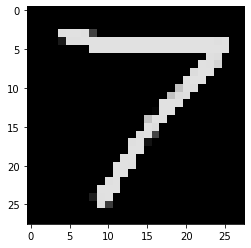

In [49]:
number7 = number7.reshape(1,28, 28)
plt.imshow(Image.fromarray(number7[0])) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

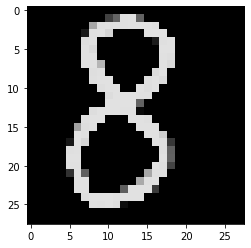

In [50]:
number8 = number8.reshape(1,28, 28)
plt.imshow(Image.fromarray(number8[0])) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()